____
# Projeto 1 - Análise do Aposentados da PNAD 2014
____

## Introdução

Para esse projeto foi pensando uma análise dos aposentados de 2014. Para isso foi pensado uma análise das seguintes variáveis:
* V9122:  Se a pessoa é aposentada ou não
* V4723: Tipo de família para todas as unidades domiciliares (em todos os tipos de família podem existir pessoas cuja condição na família era outro parente, agregado, pensionista, empregado doméstico ou parente do empregado doméstico)
* V0302: Sexo
* V0402: Condição na família
* V4838: Quantos anos de estudo a pessoa tem
* UF: Estado na qual a pessoa mora
* V4704: Condição de atividade na semana de referência para pessoas de 10 anos ou mais de idade
* V4707: Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para pessoas de 10 anos ou mais de idade
* V4750: Rendimento mensal familiar per capita 

A **primeira variável (V9122)** foi utilizado para selecionar todos informantes que responderam ser aposentados.

As variáveis **V4723, V0302** e **V0402**  foram usadas para restringir o grupo de aposentados e não aposentados.

A **variável UF** foi escolhida para dividir os grupo por região, pois existem muitas diferenças econômicas e sociais entre as regiões que podem influenciar a análise.

A **variável V4838** foi escolhida para analisar a diferença entre os anos de estudos entre os aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa e os não aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa.

A **variável V4704** e a **variável V4707** foi escolhida para analisar as diferenças entre os não aposentados e os aposentados que são homens que vivem como um casal sem filhos e são a pessoa de referência da casana questão de ser economicamente ativas e quantas horas foram trabalhadas.

A **variável V4750** foi escolhida para analisar as diferentes rendas entre os aposentados e não aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa.


____
# Análise e Resultados

In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import os

In [56]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/Carlosjunior/Documents/CHL/Insper fisico/2 semestre/Ciencia dos Dados/PNAD e Dicionario 2014


In [57]:
dados = pd.read_csv('PES2014.csv')
print('go')

go


In [58]:
dados['UF']=dados.iloc[:,2]

### Escolha dos grupos de estudo

Para a análise dos dados era necessário uniformizar os grupos, e isso foi feito através de um filtro. Esse filtro consistiu em selecionar os aposentados e não aposentados que são homens, vivem como um casal sem filhos e são a pessoa de referência da casa. Com isso nao existiria influencia do sexo e da quantidade de filhos para diferentes rendas per capita, anos de estudo, horas trabalhadas, entre outros. O fato de a pessoa ser a referência da casa pegará aqueles com maior renda da casa.

Seleção da Base de dados de Aposentados e não aposentados.

In [59]:
dados.Aposentados = dados[dados.V9122 == 2]
dados.NAposentados = dados[dados.V9122 == 4]

Seleção da Base de dados de informantes que vivem como casa sem filhos, uniformizando os grupos.

In [60]:
dados.Aposentados0 = dados.Aposentados[dados.V4723 == 1]
dados.NAposentados0 = dados.NAposentados[dados.V4723 == 1]

/Users/Carlosjunior/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


Com essa variável foi selecionado somente os homens desse grupos.

In [61]:
dados.Aposentados0_Homens = dados.Aposentados0[dados.V0302 == 2]
dados.NAposentados0_Homens = dados.NAposentados0[dados.V0302 == 2]

/Users/Carlosjunior/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


Essa seleção permite restringir os grupos a pessoas que são referencia na família.

In [62]:
dados.Aposentados0_Homens_Ref = dados.Aposentados0_Homens[dados.V0402 == 1]
dados.NAposentados0_Homens_Ref = dados.NAposentados0_Homens[dados.V0402 == 1]

/Users/Carlosjunior/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


## Regiões

Para o começo da análise realizou-se uma análise dos aposentados e não aposentados, conforme as características estabelecidas, nas regiões do país. Com isso analisou a sua distribuição.

In [63]:
dados['UF']=dados.iloc[:,2]
faixa = range(10,70,10)
dados.Aposentados0_Homens_Ref.Regioes = pd.cut(dados.Aposentados0_Homens_Ref.UF,faixa)
dados.Aposentados0_Homens_Ref.Regioes.cat.categories = ('Norte','Nordeste','Sudeste','Sul','Centro Oeste')
ut8 = (dados.Aposentados0_Homens_Ref.Regioes.value_counts(True)*100).round(decimals=1)

In [64]:
dados['UF']=dados.iloc[:,2]
faixa = range(10,70,10)
dados.NAposentados0_Homens_Ref.Regioes = pd.cut(dados.NAposentados0_Homens_Ref.UF,faixa)
dados.NAposentados0_Homens_Ref.Regioes.cat.categories = ('Norte','Nordeste','Sudeste','Sul','Centro Oeste')
ut9 = (dados.NAposentados0_Homens_Ref.Regioes.value_counts(True)*100).round(decimals=1)

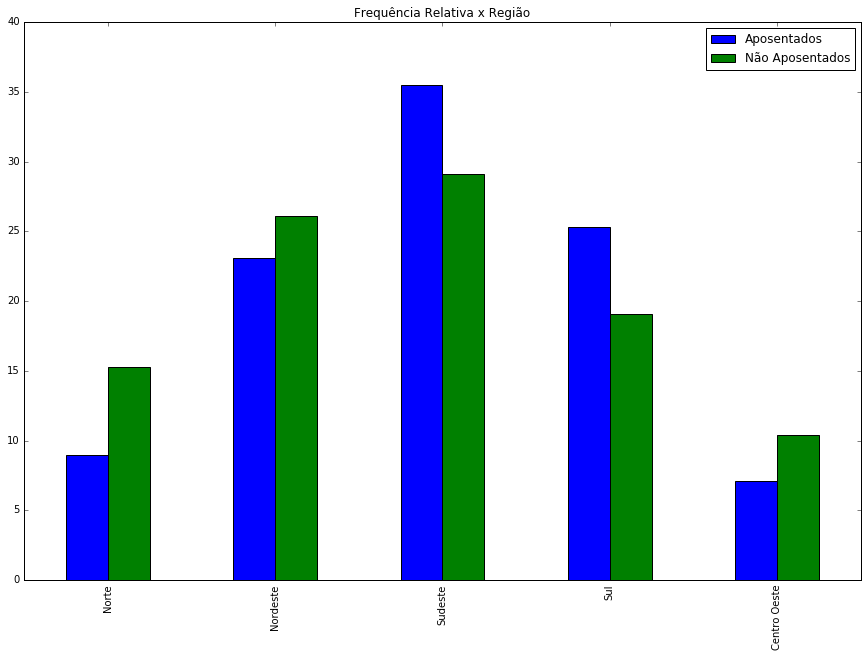

In [65]:
Apos = []
Napos = []

for i in range(5):
    a = (dados.NAposentados0_Homens_Ref.Regioes.value_counts(True)[i]*100).round(decimals=1)
    b = (dados.Aposentados0_Homens_Ref.Regioes.value_counts(True)[i]*100).round(decimals=1)
    Apos.append(b)
    Napos.append(a)
data = pd.DataFrame({'Aposentados':Apos,'Não Aposentados':Napos},index=['Norte','Nordeste','Sudeste','Sul','Centro Oeste'])
data.plot(kind='bar',figsize=(15,10))
plt.title('Frequência Relativa x Região')

### Conclusão 1
Com esse gráfico é possível ver que somente as regiões Sudeste e Sul tem maior número de aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa do que não aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa.


## Anos de Estudos 

Para a segunda variável foi feito uma análise do histograma dos anos de estudo.

In [66]:
faixas = [1,5,10,16]
ut1 = pd.cut(dados.Aposentados0_Homens_Ref.V4803,faixas)
utt1=(ut1.value_counts(True)*100).round(decimals=1)

In [67]:
faixas = [1,5,10,16]
ut2 = pd.cut(dados.NAposentados0_Homens_Ref.V4803,faixas)
utt2=(ut2.value_counts(True)*100).round(decimals=1)

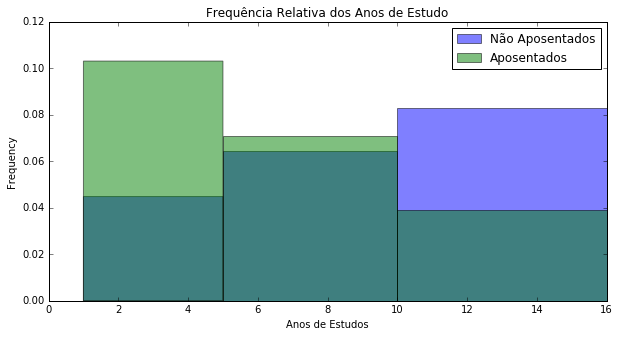

In [68]:
plot = dados.NAposentados0_Homens_Ref.V4803.plot.hist(bins=faixas, normed = 1,figsize=(10,5),label='Não Aposentados',alpha = 0.5)
plot = dados.Aposentados0_Homens_Ref.V4803.plot.hist(bins=faixas, normed = 1,figsize=(10,5),label = 'Aposentados',alpha=0.5)
plt.legend()
plt.title('Frequência Relativa dos Anos de Estudo')
plt.xlabel('Anos de Estudos')

### Conclusão 2

Com esse gráfico é possível concluir que os aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa tendem a ter menor número de estudo do que os não aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa. Isso também mostra que as pessoas conforme o tempo passou, o estudo foi mais valorizado; e também é possível concluir que o ensino melhorou já que mais gente está passando mais tempo estudando.

## Renda per capita

In [69]:
dados.NAposentados0_Homens_Ref.Renda = dados.NAposentados0_Homens_Ref.V4750[dados.V4750 != 999999999999]
dados.Aposentados0_Homens_Ref.Renda = dados.Aposentados0_Homens_Ref.V4750[dados.V4750 != 999999999999]

In [70]:
faixa = [80,160,320,640,1500,3000,5000,10000,15000,20000,25000,28250]
faixa01 = [80,160,320,640,1500,3000,5000]
faixa02 = [5000,10000,15000,20000,25000,30000]
faixa03 = [30000,60000,90000,150000,331200]

In [71]:
ut3 = pd.cut(dados.Aposentados0_Homens_Ref.Renda,faixa)
ut4 = pd.cut(dados.NAposentados0_Homens_Ref.Renda,faixa)

utt3 = (ut3.value_counts(True)*100).round(decimals=1)
utt4 = (ut4.value_counts(True)*100).round(decimals=1)

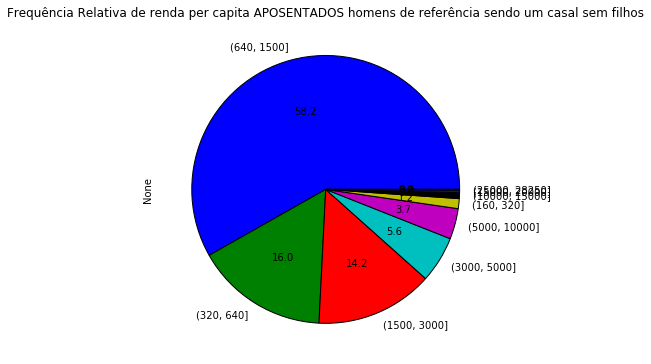

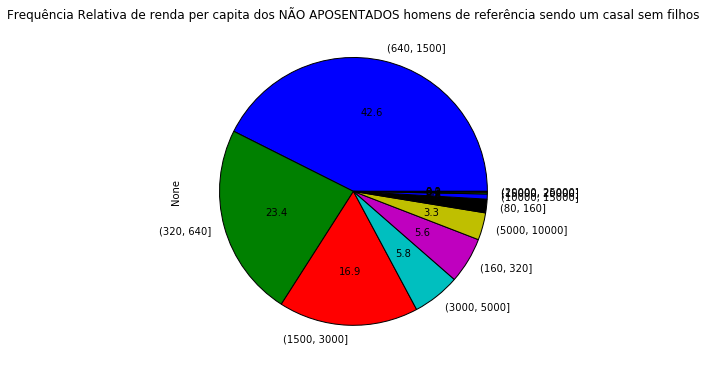

In [72]:
plot = utt3.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Frequência Relativa de renda per capita APOSENTADOS homens de referência sendo um casal sem filhos')
plt.show()
plot = utt4.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Frequência Relativa de renda per capita dos NÃO APOSENTADOS homens de referência sendo um casal sem filhos')
plt.show()

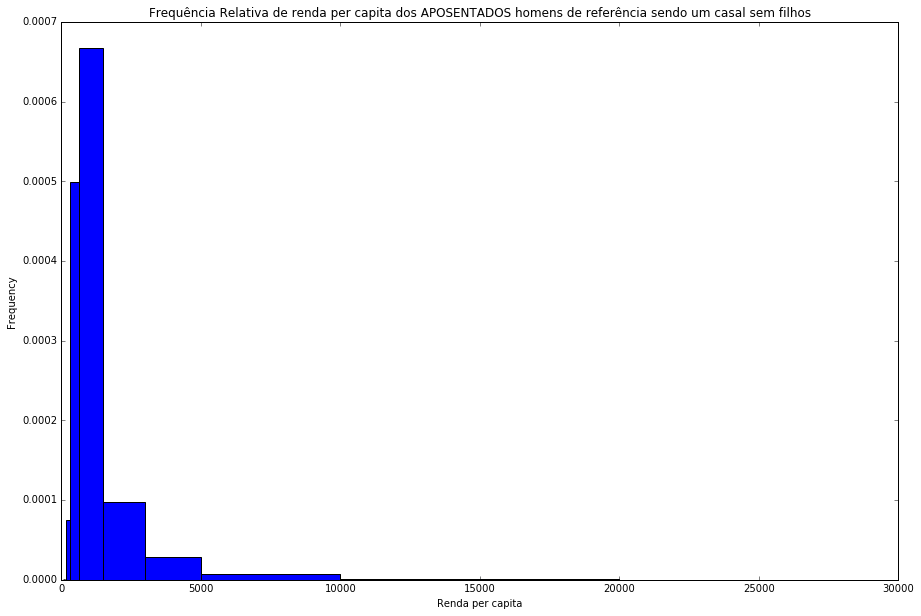

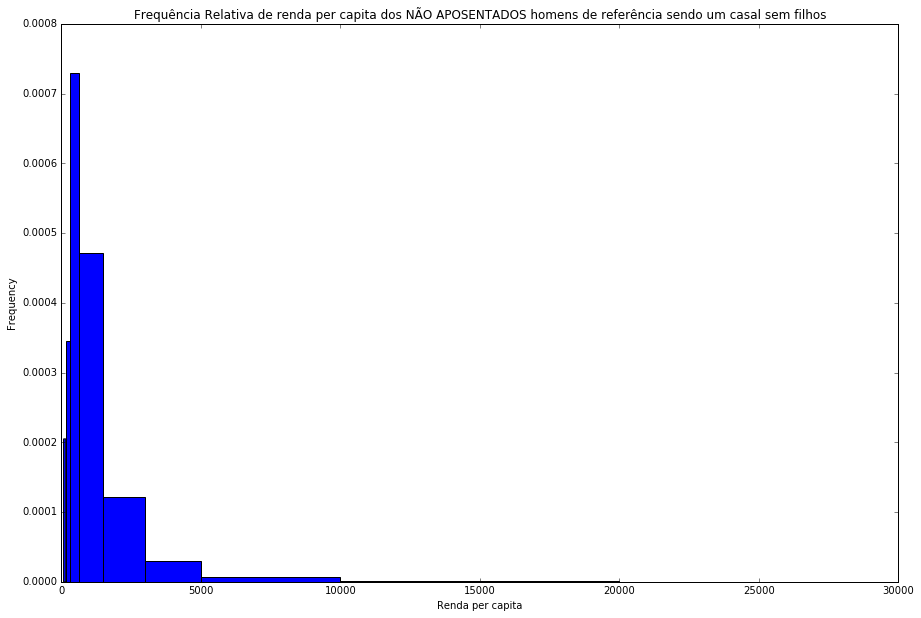

In [73]:
plot = dados.Aposentados0_Homens_Ref.Renda.plot.hist(bins=faixa, normed = 1,figsize = (15,10))
plt.xlabel('Renda per capita')
plt.title('Frequência Relativa de renda per capita dos APOSENTADOS homens de referência sendo um casal sem filhos')
plt.show()

plot = dados.NAposentados0_Homens_Ref.Renda.plot.hist(bins=faixa, normed = 1,figsize = (15,10))
plt.xlabel('Renda per capita')
plt.title('Frequência Relativa de renda per capita dos NÃO APOSENTADOS homens de referência sendo um casal sem filhos')
plt.show()

O gráfico acima fica difícil vizualizar as faixas de valores antre 0 e 5000, para isso o grafico abaixo só tem valores de 0 a 5000 para renda per capita

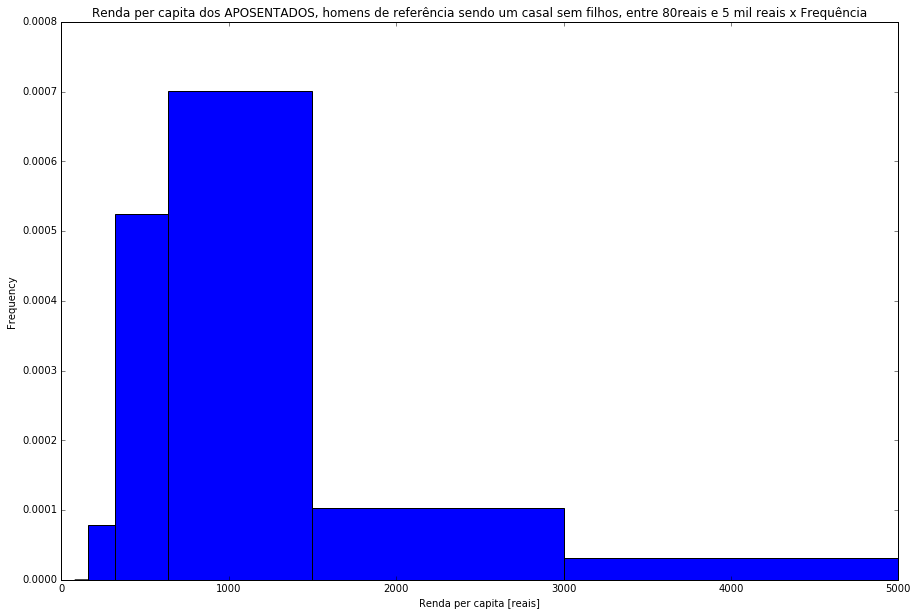

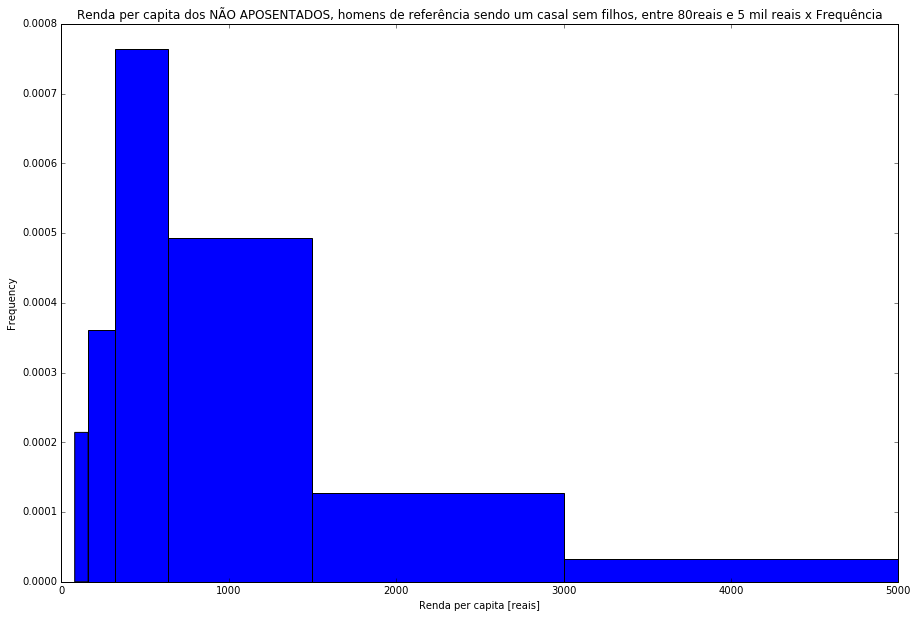

In [74]:
utt33 = pd.cut(dados.Aposentados0_Homens_Ref.Renda,faixa01)
utt44 = pd.cut(dados.NAposentados0_Homens_Ref.Renda,faixa01)

plot = dados.Aposentados0_Homens_Ref.Renda.plot.hist(bins=faixa01, normed = 1,figsize = (15,10))
plt.xlabel('Renda per capita [reais]')
plt.title('Renda per capita dos APOSENTADOS, homens de referência sendo um casal sem filhos, entre 80reais e 5 mil reais x Frequência')
plt.show()

plot = dados.NAposentados0_Homens_Ref.Renda.plot.hist(bins=faixa01, normed = 1,figsize = (15,10))
plt.xlabel('Renda per capita [reais]')
plt.title('Renda per capita dos NÃO APOSENTADOS, homens de referência sendo um casal sem filhos, entre 80reais e 5 mil reais x Frequência')
plt.show()

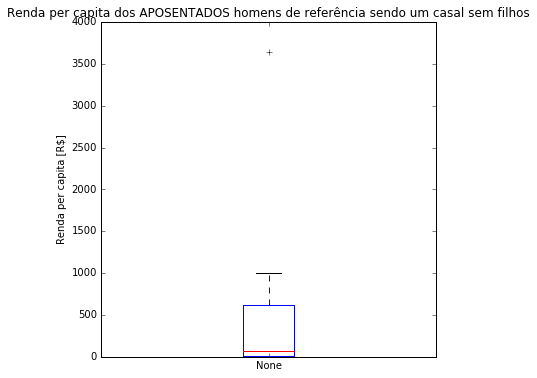

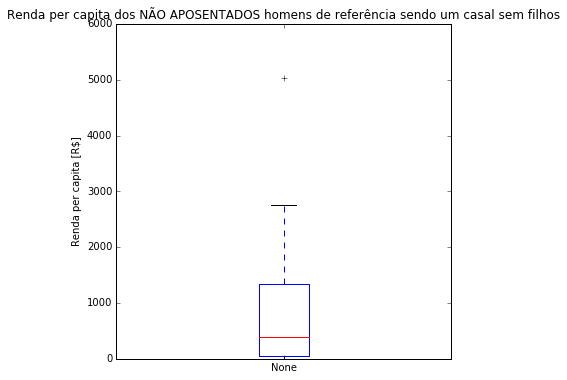

In [75]:
ut33=ut3.value_counts()
ut44=ut4.value_counts()
plot = ut33.plot(kind='box',figsize=(6, 6))
plt.ylabel('Renda per capita [R$]')
plt.title('Renda per capita dos APOSENTADOS homens de referência sendo um casal sem filhos')
plt.show()

plot = ut44.plot(kind='box',figsize=(6, 6))
plt.ylabel('Renda per capita [R$]')
plt.title('Renda per capita dos NÃO APOSENTADOS homens de referência sendo um casal sem filhos')


plt.show()

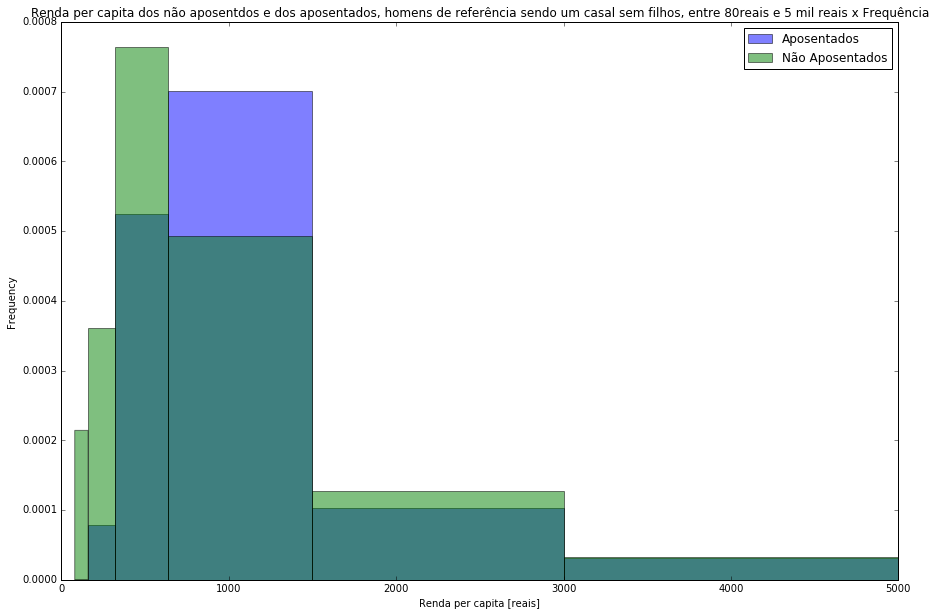

In [76]:
plot = dados.Aposentados0_Homens_Ref.Renda.plot.hist(bins=faixa01, normed = 1,figsize = (15,10),alpha = 0.5,label='Aposentados')
plt.xlabel('Renda per capita [reais]')
plt.title('Renda per capita dos não aposentdos e dos aposentados, homens de referência sendo um casal sem filhos, entre 80reais e 5 mil reais x Frequência')
plot = dados.NAposentados0_Homens_Ref.Renda.plot.hist(bins=faixa01, normed = 1,figsize = (15,10),alpha=0.5,label='Não Aposentados')
plt.legend()

### Conclusão 3
Os aposentados tendem a ter maior frequência na categoria entre R$640,00 e R1500,00, enquanto na outras categorias os não aposentados estão em maior frequencia. Porém na categoria entre R3000,00 e R5000,00 a frequencia é aproximadamente a mesma. 

Os aposentados tendem a se concentrar mais no meio do grafico, ou seja, concentram em salários não muito alto e não muito baixos, mas sim na média.

Além disso é possível ver que a amplitude de renda para não aposentados é maior que a dos aposentados. Mas para não aposentados e para os aposentados, a mediana está deslocada para baixo, indicando que há maior concentração de renda para valores mais baixos nos dois grupos.

## Condição de atividade na semana de referência para pessoas de 10 anos ou mais de idade

Uma análise de qual a porcentagem da população de aposentados e não aposentados são economicamente ou não ativas.

In [77]:
dados.Aposentados0_Homens_Ref.V4704 = dados.Aposentados0_Homens_Ref.V4704.astype('category')
dados.Aposentados0_Homens_Ref.V4704.cat.categories = ('Economicamente ativa','Não economicamente ativa')

dados.NAposentados0_Homens_Ref.V4704 = dados.NAposentados0_Homens_Ref.V4704.astype('category')
dados.NAposentados0_Homens_Ref.V4704.cat.categories = ('Economicamente ativa','Não economicamente ativa')

/Users/Carlosjunior/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [78]:
ut5 = (dados.Aposentados0_Homens_Ref.V4704.value_counts(True)*100).round(decimals=1)

ut6 = (dados.NAposentados0_Homens_Ref.V4704.value_counts(True)*100).round(decimals=1)

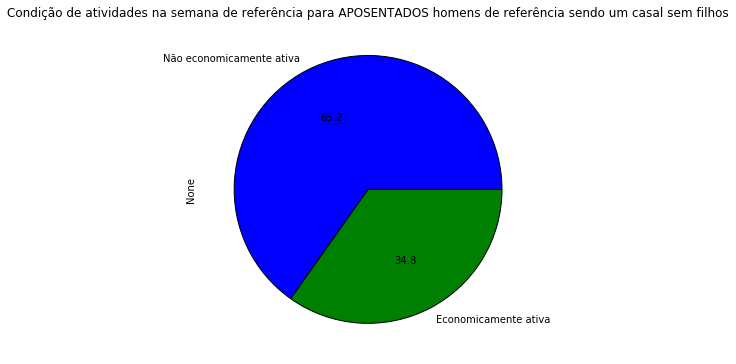

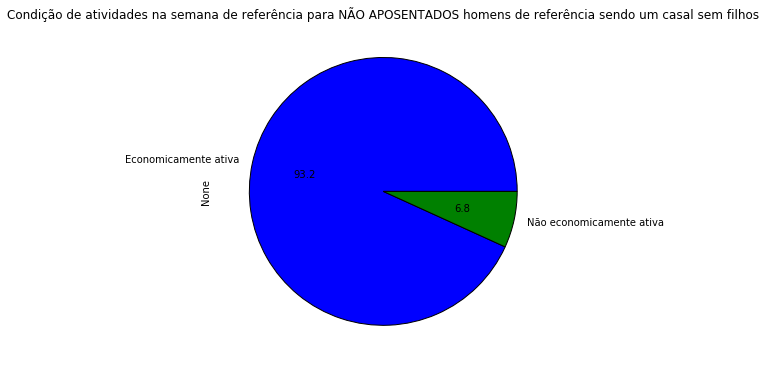

In [79]:
plot = ut5.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Condição de atividades na semana de referência para APOSENTADOS homens de referência sendo um casal sem filhos')
plt.show()

plot = ut6.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Condição de atividades na semana de referência para NÃO APOSENTADOS homens de referência sendo um casal sem filhos')
plt.show()

### Conclusão 4

Com esse gráfico é possível perceber que os aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa têm maioria como não economicamente ativas, ao contrário dos não aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa que têm a maioria como economicamente ativa.

## Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para pessoas de 10 anos ou mais de idade

In [80]:
dados.Aposentados0_Homens_Ref.V4707 = dados.Aposentados0_Homens_Ref.V4707.astype('category')
dados.Aposentados0_Homens_Ref.V4707.cat.categories = ('Até 14 horas','Entre 15 horas e 39 horas', 'Entre 40 horas e 44 horas','Entre 45 horas e 48 horas','49 horas ou mais')

dados.NAposentados0_Homens_Ref.V4707 = dados.NAposentados0_Homens_Ref.V4707.astype('category')
dados.NAposentados0_Homens_Ref.V4707.cat.categories = ('Até 14 horas','Entre 15 horas e 39 horas', 'Entre 40 horas e 44 horas','Entre 45 horas e 48 horas','49 horas ou mais')

/Users/Carlosjunior/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [81]:
ut7 = ((dados.Aposentados0_Homens_Ref.V4707.value_counts()/2233)*100).round(decimals=1)

ut8 = ((dados.NAposentados0_Homens_Ref.V4707.value_counts()/11311)*100).round(decimals=1)

In [82]:
utt7 = (dados.Aposentados0_Homens_Ref.V4707.value_counts())

utt8 = (dados.NAposentados0_Homens_Ref.V4707.value_counts())


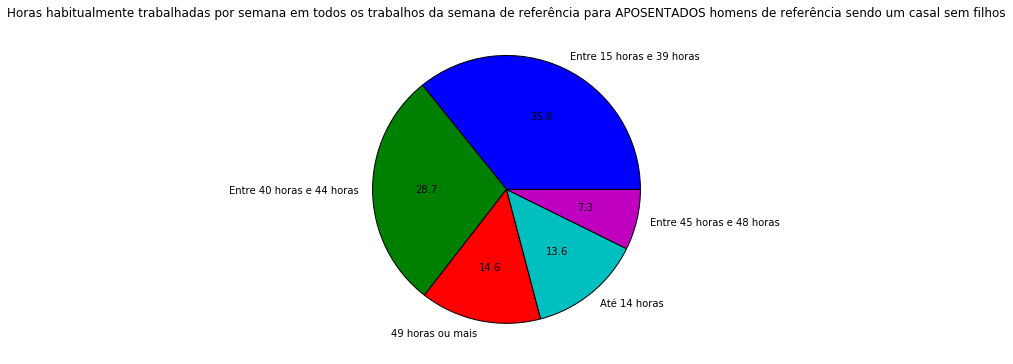

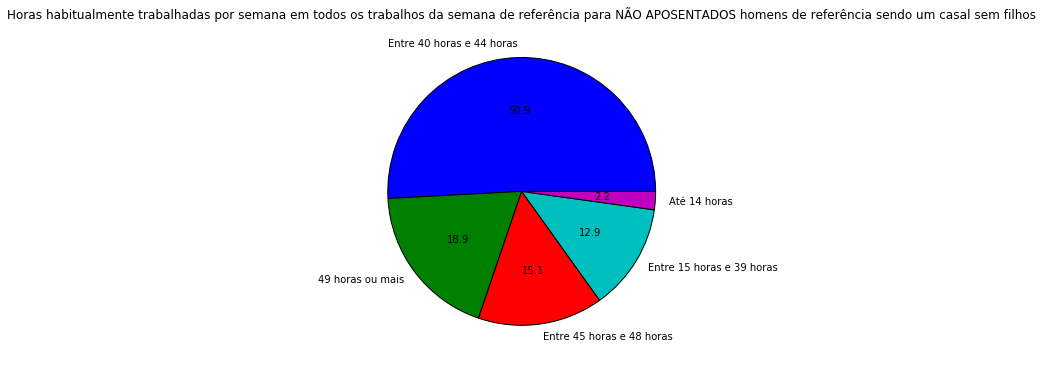

In [83]:
plot = ut7.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para APOSENTADOS homens de referência sendo um casal sem filhos')
plt.ylabel('')
plt.show()

plot = ut8.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para NÃO APOSENTADOS homens de referência sendo um casal sem filhos')
plt.ylabel('')
plt.show()

In [84]:
Apos = []
Napos = []

for i in range(5):
    a =((dados.Aposentados0_Homens_Ref.V4707.value_counts()[i]/2233)*100).round(decimals=1)
    n = ((dados.NAposentados0_Homens_Ref.V4707.value_counts()[i]/11311)*100).round(decimals=1)
    Apos.append(a)
    Napos.append(n)
    
data2 = pd.DataFrame({'Aposentados':Apos,'Não Aposentados':Napos},index=('Até 14 horas','Entre 15 horas e 39 horas', 'Entre 40 horas e 44 horas','Entre 45 horas e 48 horas','49 horas ou mais'))

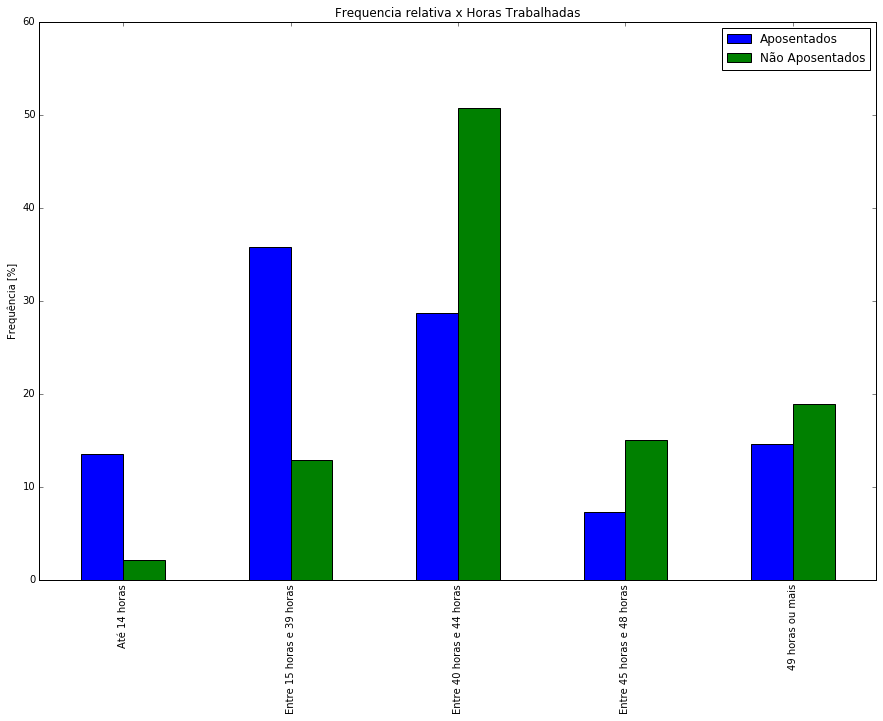

In [85]:
data2.plot(kind='bar',figsize = (15,10))
plt.title('Frequencia relativa x Horas Trabalhadas')
plt.ylabel('Frequência [%]')

### Conclusão 5

Os aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa tendem a trabalhar menos que os não aposentados homens que vivem como um casal sem filhos e são a pessoa de referência da casa.

A concentração de horas trabalhadas para os aposentados ficam entre 0 e 44 horas, enquanto os não aposentados concentra-se entre 40 e 44 horas. 

Uma possível explicação para isso seria o fato de que a pessoa aposentada ja nao está tao apta a trabalhar por tantas horas como um não aposentados, e por isso tendem a trabalhar menos.

___

In [86]:
dados.Aposentados0_Homens_Ref.V0404=dados.Aposentados0_Homens_Ref.V0404.astype('category')

#dados.NAposentados0_Homens_Ref.V0404=dados.Aposentados0_Homens_Ref.V0404.astype('category')

#Apo_raca=[]
Napo_raca=[]
for i in range(len(dados.NAposentados0_Homens_Ref.V0404)):
    #q = dados.Aposentados0_Homens_Ref.V0404.iloc[i]
    w = dados.NAposentados0_Homens_Ref.V0404.iloc[i]
    if w==0:
        w='Indígena'
    elif w==2:
        w='Branca'
    elif w==4:
        w='Preta'
    elif w==6:
        w='Amarela'
    elif w==8:
        w='Parda'
    #Apo_raca.append(q)
    Napo_raca.append(w)

raca = pd.DataFrame({'Não Aposentados':Napo_raca})
dados.Aposentados0_Homens_Ref.V0404.cat.categories = ('Indígena','Branca','Preta','Amarela','Parda')

#dados.NAposentados0_Homens_Ref.V0404.cat.categories = ('Indígena','Branca','Preta','Amarela','Parda')
raca['NApo']=raca.iloc[:,:]


/Users/Carlosjunior/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [87]:
ut9 = (dados.Aposentados0_Homens_Ref.V0404.value_counts(True)*100).round(decimals=1)

ut10 = (raca.NApo.value_counts(True)*100).round(decimals = 1)

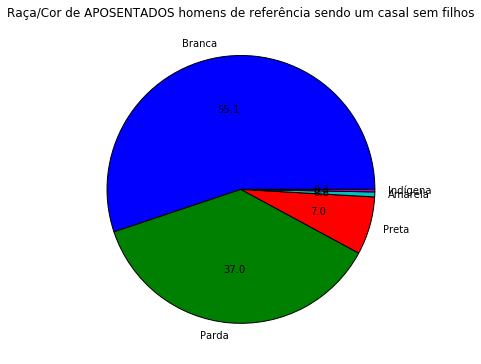

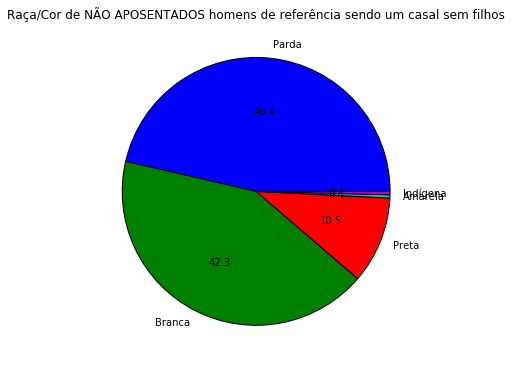

In [88]:
plot = ut9.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Raça/Cor de APOSENTADOS homens de referência sendo um casal sem filhos')
plt.ylabel('')
plt.show()

plot = ut10.plot(kind='pie',autopct='%.1f',figsize=(6, 6),title='Raça/Cor de NÃO APOSENTADOS homens de referência sendo um casal sem filhos')
plt.ylabel('')
plt.show()

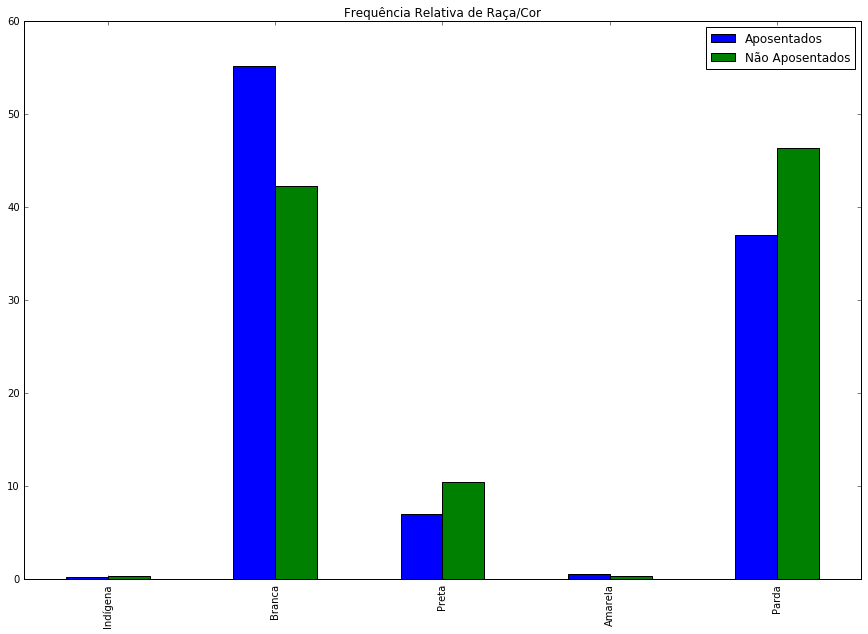

In [89]:
Apos_r = []
Napos_r = [0.4,42.3,10.5,0.4,46.4]
sa=0
sn=0
for i in range(5):
    #a = ((raca.NApo.value_counts(True)[i]*100).round(decimals = 1)).round(decimals=1)
    b = (dados.Aposentados0_Homens_Ref.V0404.value_counts(True)[i]*100).round(decimals=1)
    Apos_r.append(b)
    #Napos_r.append(a)

data3 = pd.DataFrame({'Aposentados':Apos_r,'Não Aposentados':Napos_r},index=['Indígena','Branca','Preta','Amarela','Parda'])
data3.plot(kind='bar',figsize=(15,10))
plt.title('Frequência Relativa de Raça/Cor')

### Conclusão 6

A partir desse gráfico é possivel dizer que a o população de aposentados tem a raça branca como a de maior frequência, enquanto a população de não aposentados tem a raça parda como a de maior frequência.

Também é possivel dizer que a população brasileira de homens de referência que vivem como casal sem filhos, tende a ficar com maioria parda.

___

## Renda per capita x Anos de Estudo

Tabela cruzada de renda por anos estudos para os grupos em estudo.

In [90]:
utt33.cat.categories=('Renda de 80 até 160','Renda de 160 até 320','Renda de 320 até 640','Renda de 640 até 1500','Renda de R$1500 até 3000','Renda de 3000 até 5000')
utt44.cat.categories=('Renda de 80 até 160','Renda de 160 até 320','Renda de 320 até 640','Renda de 640 até 1500','Renda de R$1500 até 3000','Renda de 3000 até 5000')
ut1.cat.categories = ('De 1 a 5 anos de estudos','De 5 a 10 anos de estudos','De 10 a 16 anos de estudos')
ut2.cat.categories = ('De 1 a 5 anos de estudos','De 5 a 10 anos de estudos','De 10 a 16 anos de estudos')
ct0 = pd.crosstab(utt33,dados.Aposentados0_Homens_Ref.V0404)#,margins = True)
ct1 = pd.crosstab(utt44,dados.NAposentados0_Homens_Ref.V0404)#,margins = True)

In [91]:
ct0n=((ct0*100)/6501).round(decimals=1)
ct1n=((ct1*100)/12500).round(decimals=1)

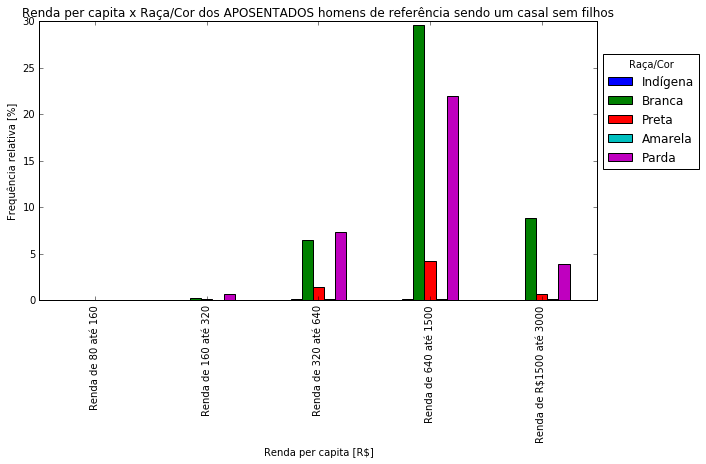

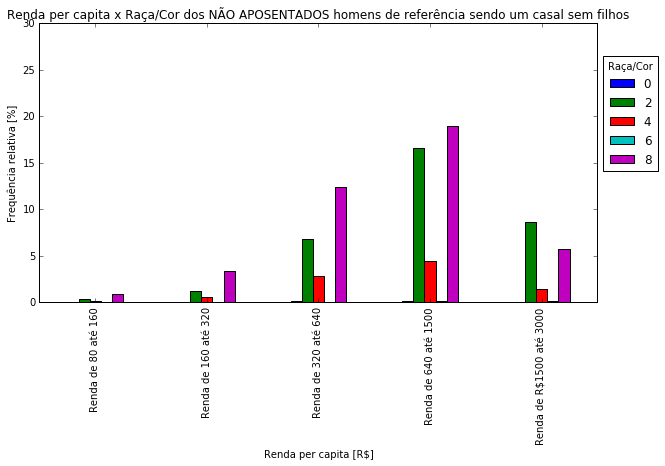

In [92]:
ct0n.plot(kind='bar',figsize = (10,5),)
plt.xlabel('Renda per capita [R$]')
plt.title('Renda per capita x Raça/Cor dos APOSENTADOS homens de referência sendo um casal sem filhos')
plt.ylabel('Frequência relativa [%]')
plt.legend(title = 'Raça/Cor',bbox_to_anchor=(1, 0.45), loc = 3)
plt.axis([-0.5,4.5,0,30])
plt.show()

ct1n.plot(kind='bar',figsize = (10,5))
plt.title('Renda per capita x Raça/Cor dos NÃO APOSENTADOS homens de referência sendo um casal sem filhos')
plt.xlabel('Renda per capita [R$]')
plt.legend(title = 'Raça/Cor',bbox_to_anchor=(1, 0.45), loc = 3)
plt.ylabel('Frequência relativa [%]')
plt.axis([-0.5,4.5,0,30])
plt.show()

### Conclusão 7

A partir desse gráfico é possível concluir que os aposentados brancos são os que estão com maior frequencia na renda ente 640 e 1500 reais. Já os não aposentados pardos é que estão em maior frequência nessa categoria.

___

## Regiões x Raça/Cor

In [93]:
ct0 = pd.crosstab(dados.Aposentados0_Homens_Ref.Regioes,dados.Aposentados0_Homens_Ref.V0404)#,margins = True)
ct1 = pd.crosstab(dados.NAposentados0_Homens_Ref.Regioes,dados.NAposentados0_Homens_Ref.V0404)#,margins = True)

In [94]:
ct0n=((ct0/ct0.sum().sum())*100)
ct1n=((ct1/ct1.sum().sum())*100).round(decimals=1)

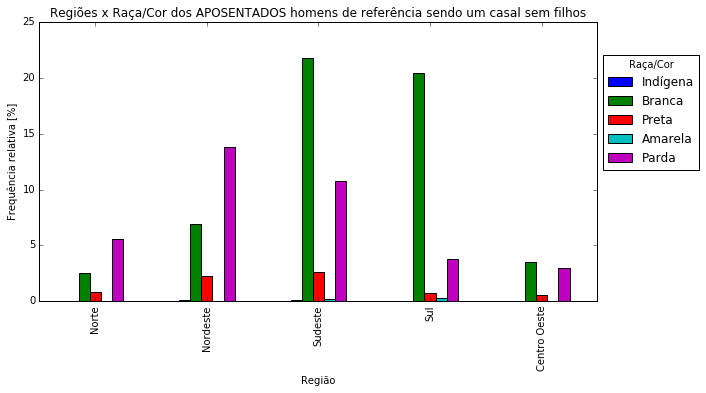

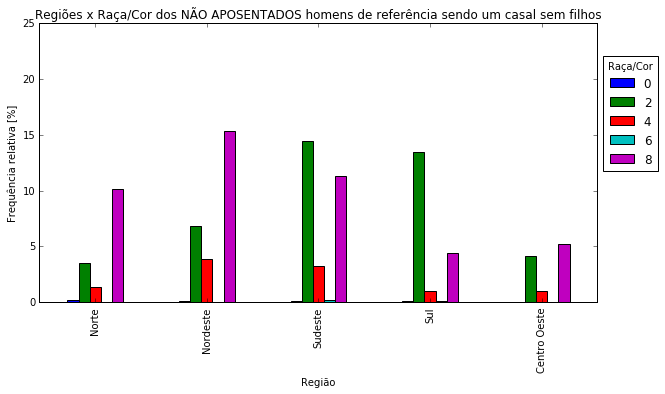

In [95]:
ct0n.plot(kind='bar',figsize = (10,5),)
plt.xlabel('Região')
plt.title('Regiões x Raça/Cor dos APOSENTADOS homens de referência sendo um casal sem filhos')
plt.ylabel('Frequência relativa [%]')
plt.legend(title = 'Raça/Cor',bbox_to_anchor=(1, 0.45), loc = 3)
plt.axis([-0.5,4.5,0,25])
plt.show()

ct1n.plot(kind='bar',figsize = (10,5))
plt.title('Regiões x Raça/Cor dos NÃO APOSENTADOS homens de referência sendo um casal sem filhos')
plt.xlabel('Região')
plt.legend(title = 'Raça/Cor',bbox_to_anchor=(1, 0.45), loc = 3)
plt.ylabel('Frequência relativa [%]')
plt.axis([-0.5,4.5,0,25])
plt.show()

### Conclusão 8

Nesse gráfico é possível ver que a frequência da população parda aumentou nas regiões Nordeste e Norte quando comparado os aposentados com os não aposentados que são homens que vivem como um casal sem filhos e são a pessoa de referência da casa. Enquanto a frequência da população branca nas regiões Sul e Sudeste diminuiu consideravelmente.

___

## Conclusão Final

**Conclusões**

* Os aposentados e não aposentados estão em maior número nas regiões Sudeste e Sul; 
* Os aposentados tem menor número de anos de estudo do que não aposentados; 
* Os aposentados tem maior frequência de renda entre 640 e 1500 reais enquanto os não aposentados estão mais distribuidos; 
* Os aposentados são menos economicamente ativos que os nao aposentados
* Os aposentados que trablham, trabalham menos que os não aposentados
* Enquanto os aposentados tem maioria branca, os não aposentados tem maioria parda
* Tanto os aposentados brancos como os não aposentados brancos tendem a estar em maior frequeência em rendas maiores que 1500.
* A população parda vem aumentando principalmente pelo aumento nas regiões Nordeste e Norte, e população branca vem diminuindo devido a queda nas regiões Sul e Sudeste
